In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import numpy as np


In [2]:
'''
Dataset loaded here are iris-dataset
'''
data = load_iris()
df = pd.DataFrame(data.data, columns= data.feature_names)

df['species'] = pd.Categorical.from_codes(data.target, data.target_names)
# writing function for Empirical cumulative distribution function for 1D array

def cal_ecdf(values):
    x_axis = np.sort(values)
    y_axis = np.arange(1, len(values) + 1) / len(values)
    
    return x_axis, y_axis

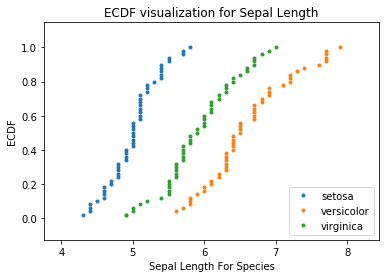

In [4]:
'''
our ecdf function is ready, lets plot for sepalLength for each three species
in ecdf and do some statistical analysis. 
'''

setosa_sepal = df.loc[df['species'] == 'setosa', ['sepal length (cm)']]
virginica_sepal = df.loc[df['species']== 'virginica', ['sepal length (cm)']]
versicolor_sepal = df.loc[df['species']== 'versicolor', ['sepal length (cm)']]

x_setosa, y_setosa = cal_ecdf(setosa_sepal.values.ravel()) 
x_virginica, y_virginica = cal_ecdf(virginica_sepal.values.ravel())
x_versicolor, y_versicolor = cal_ecdf(versicolor_sepal.values.ravel())

# plotting ECDF
plt.plot(x_setosa, y_setosa, marker = '.', linestyle = 'none')
plt.plot(x_virginica, y_virginica, marker='.', linestyle = 'none' )
plt.plot(x_versicolor, y_versicolor, marker ='.', linestyle = 'none')

plt.margins(0.15)
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
plt.xlabel('Sepal Length For Species')
plt.ylabel('ECDF')
plt.title('ECDF visualization for Sepal Length')
plt.show()



This ecdf visualisation clearly distinguish between three different species. We can see
that virginica and versicolor has more variability in sepal length than setosa. Also, 
setosa sepal length is shorter compared to virginica and versicolor. 

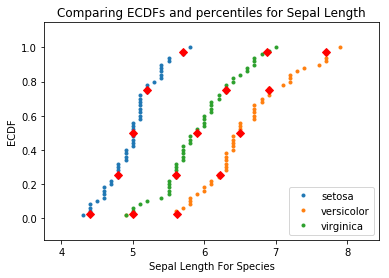

In [5]:
'''
I want to do one more quantitative exploratory analysis for this iris data. I would like
to compare and find the relation between ecdf and percentiles for sepal. Our ecdf is in 
between 0 to 1. So, lets rescale the data accordingly. 
'''

percentiles = np.array([2.5, 25, 50, 75, 97.5])
setosa_perc = np.percentile(setosa_sepal.values.ravel(), percentiles)
versicolor_perc = np.percentile(versicolor_sepal.values.ravel(), percentiles)
virginica_perc = np.percentile(virginica_sepal.values.ravel(), percentiles)

plt.plot(x_setosa, y_setosa, marker = '.', linestyle = 'none')
plt.plot(x_virginica, y_virginica, marker='.', linestyle = 'none' )
plt.plot(x_versicolor, y_versicolor, marker ='.', linestyle = 'none')


plt.plot(setosa_perc, percentiles/100, marker='D', color='red',
         linestyle='none')

plt.plot(versicolor_perc, percentiles/100, marker='D', color='red',
         linestyle='none')

plt.plot(virginica_perc, percentiles/100, marker='D', color='red',
         linestyle='none')

plt.margins(0.15)
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
plt.xlabel('Sepal Length For Species')
plt.ylabel('ECDF')
plt.title('Comparing ECDFs and percentiles for Sepal Length')
plt.show()

